# SLC MID EXAM

____________

### DATASET INFORMATION: 




## Dataset Description
This dataset contains:
* 310 Observations
* 12 Features 
* 1 Lebel

|__ col. no.__| __Attribute name__| __type__| 
|-------------|---------------------|-----------|
| Col1 | pelvic_incidence | numeric, float64|
|Col2|pelvic_tilt |numeric, float64 |
|Col3| lumbar_lordosis_angle |numeric, float64|
|Col4|sacral_slope|numeric, float64|
|Col5| pelvic_radius  |numeric, float64|
|Col6|degree_spondylolisthesis   |numeric, float64|
|Col7| pelvic_slope |numeric, float64|
|Col8|Direct_tilt  |numeric, float64|
|Col9| thoracic_slope |numeric, float64|
|Col10|  cervical_tilt |numeric, float64|
|Col11| sacrum_angle |numeric, float64|
|Col12| scoliosis_slope |numeric, float64|
|Class_att| Attribute Class | categorical, object|

In [ ]:
# Kindly change the below cells from markdown to code and execute it 

In [2]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:

    reader=csv.reader(file)
df=pd.read_csv("data_set.csv")

df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


### 1.	Data Understanding (8 marks)

a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)? (1 MARK)

b.	Calculate five-point summary for numerical variables (1 MARK)

c.	Summarize observations for categorical variables – no. of categories, % observations in each category. (2 mark)

d.	Check for defects in the data such as missing values, null, outliers, etc and also check for class imbalance. (4 marks)


In [15]:
#a
df.shape # Rows=310, columns=14
df.info()  # All except class attb are floats

#b
import numpy as np
for i in df.select_dtypes(include=np.number):
    print(df[i].describe())
    
#c
for i in df.select_dtypes(include="object"):
    print(len(df[i].value_counts()))
df["Class_att"].value_counts()  # Abnormal    210  Normal      100
df["Unnamed: 13"].value_counts() # all classes have 1 value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
Col1           310 non-null float64
Col2           310 non-null float64
Col3           310 non-null float64
Col4           310 non-null float64
Col5           310 non-null float64
Col6           310 non-null float64
Col7           310 non-null float64
Col8           310 non-null float64
Col9           310 non-null float64
Col10          310 non-null float64
Col11          310 non-null float64
Col12          310 non-null float64
Class_att      310 non-null object
Unnamed: 13    14 non-null object
dtypes: float64(12), object(2)
memory usage: 34.0+ KB
count    310.000000
mean      60.496653
std       17.236520
min       26.147921
25%       46.430294
50%       58.691038
75%       72.877696
max      129.834041
Name: Col1, dtype: float64
count    310.000000
mean      17.542822
std       10.008330
min       -6.554948
25%       10.667069
50%       16.357689
75%       22.120395
max       49.

 Attribute10= cervical_tilt(numeric)                  1
Attribute6 = degree_spondylolisthesis (numeric)       1
Prediction is done by using binary classification.    1
Attribute1  = pelvic_incidence  (numeric)             1
Attribute5 = pelvic_radius (numeric)                  1
Attribute3 = lumbar_lordosis_angle (numeric)          1
Attribute2 = pelvic_tilt (numeric)                    1
 Attribute7= pelvic_slope(numeric)                    1
Attribute4 = sacral_slope (numeric)                   1
 Attribute11=sacrum_angle(numeric)                    1
 Attribute9= thoracic_slope(numeric)                  1
Attribute class {Abnormal, Normal}                    1
 Attribute12= scoliosis_slope(numeric)                1
 Attribute8= Direct_tilt(numeric)                     1
Name: Unnamed: 13, dtype: int64

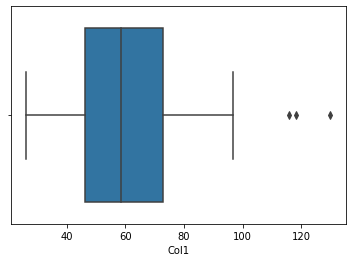

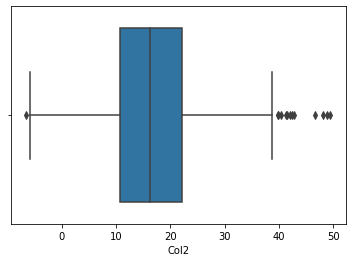

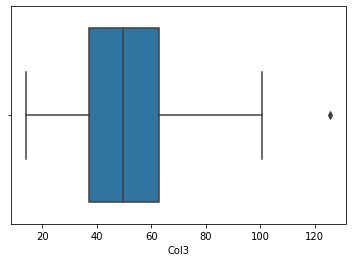

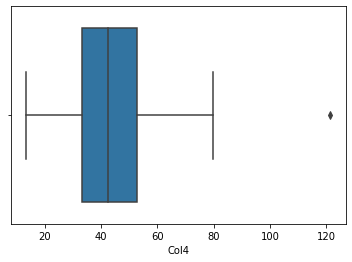

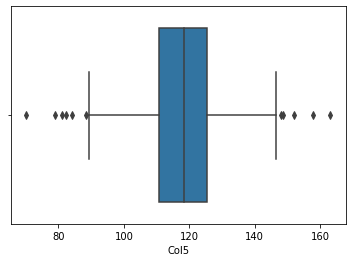

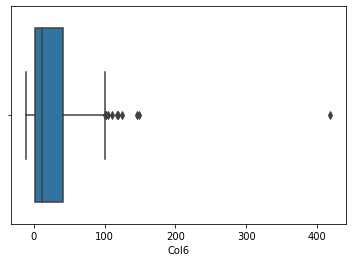

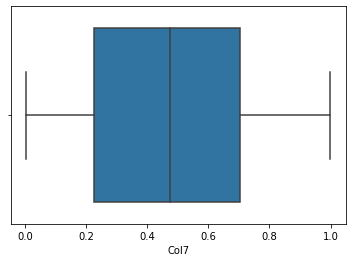

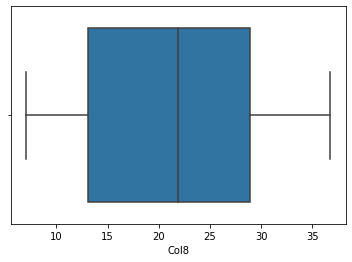

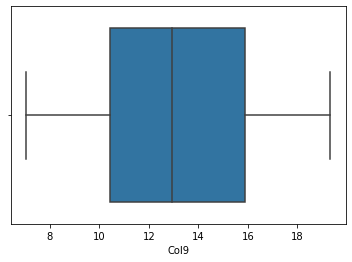

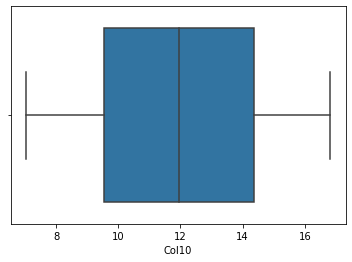

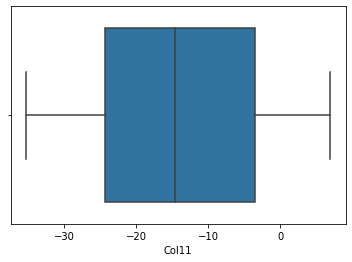

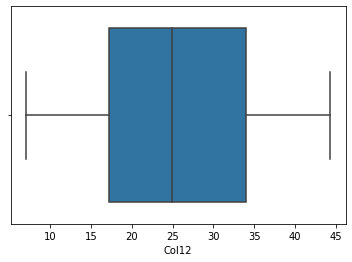

Abnormal    210
Normal      100
Name: Class_att, dtype: int64

In [21]:
#d
df.isnull().sum()   # Only Unnnamed has 296 nulls
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
for i in df.select_dtypes(include=np.number):
    plt.figure()
    sns.boxplot(df[i])
    plt.show()
    
# col 1 to col 6 have outliers

df["Class_att"].value_counts()  # Abnormal    210  Normal      100
# Data for abnormal class is double that for normal class. It may mean that classifier may correctly predict abnormal class
# but may not be able to correctly predict normal class that well.


### 2.	Data Preparation (17 marks)

a.	Fix the defects found above and do appropriate treatment if any. (4 marks)

b.	Visualize the data using relevant plots. Find out the variables which are highly correlated with Target? (5 marks)

c.	Do you want to exclude some variables from the model based on this analysis? What other actions will you take before moving ahead with model creation? (4 marks)

d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (4 marks)


In [25]:
for i in df.select_dtypes(include=np.number):
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    iqr=Q3-Q1
    df.loc[(df[i]<Q1-1.5*iqr)|(df[i]>Q3+1.5*iqr),i]=df[i].median()

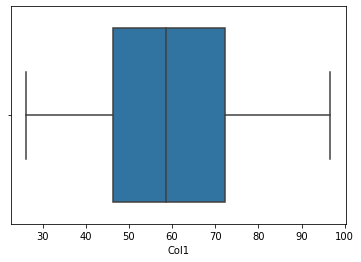

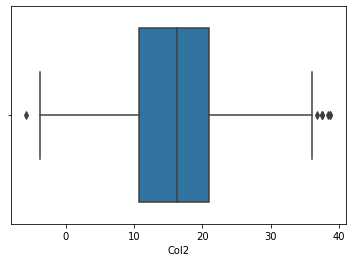

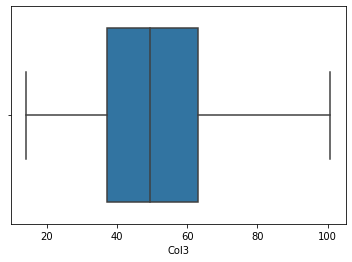

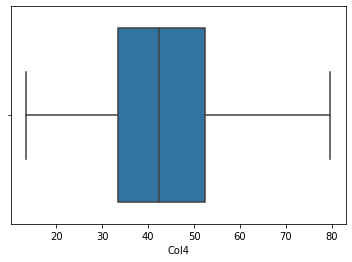

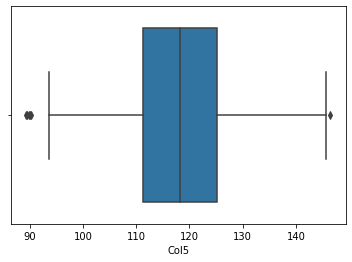

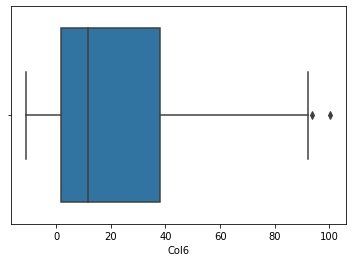

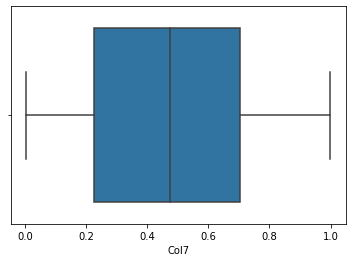

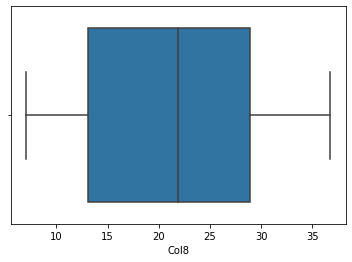

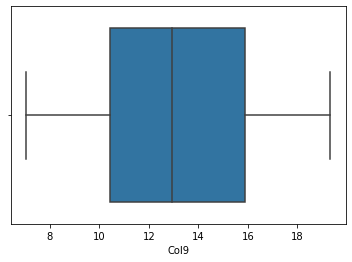

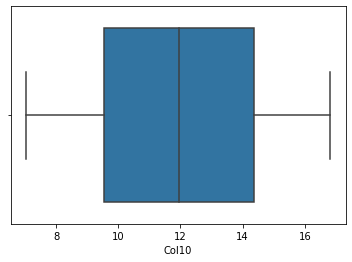

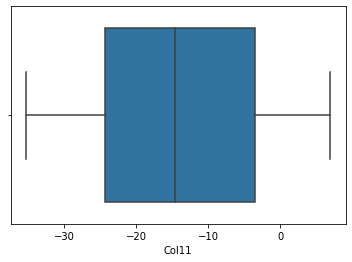

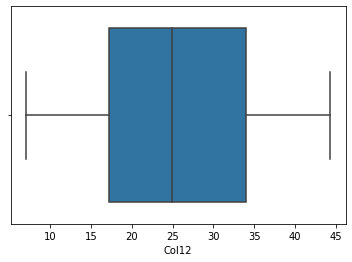

In [26]:
for i in df.select_dtypes(include=np.number):
    plt.figure()
    sns.boxplot(df[i])
    plt.show()

In [29]:
for i in df.select_dtypes(include=np.number):
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    iqr=Q3-Q1
    df.loc[(df[i]<Q1-1.5*iqr)|(df[i]>Q3+1.5*iqr),i]=df[i].median()

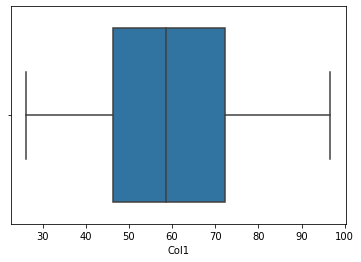

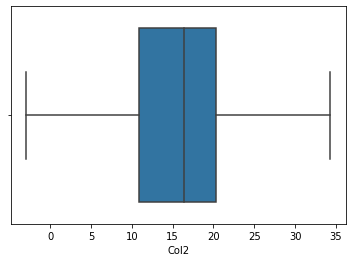

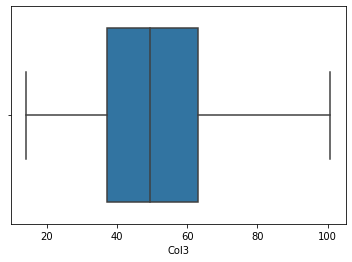

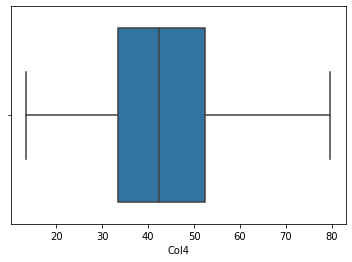

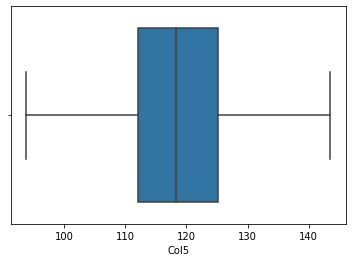

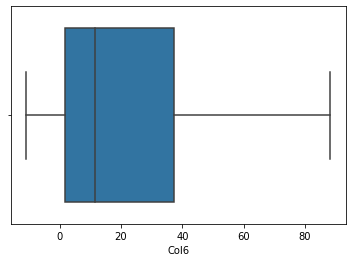

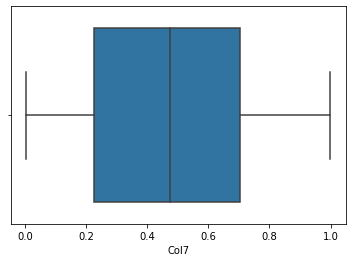

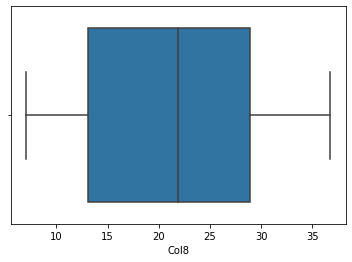

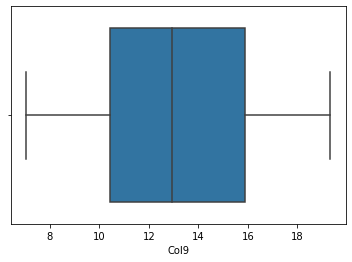

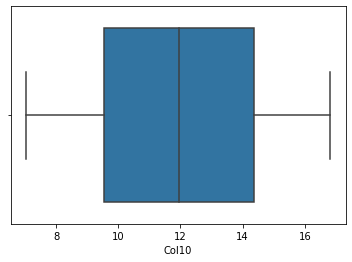

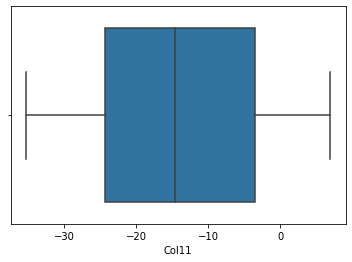

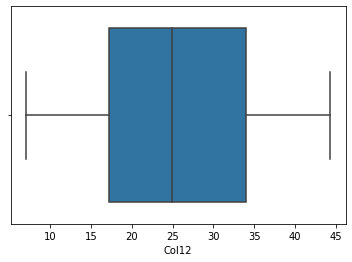

In [30]:
for i in df.select_dtypes(include=np.number):
    plt.figure()
    sns.boxplot(df[i])
    plt.show()

In [35]:
# Label encode cateogrical colum attribute to 0 and 1
def att(i):
    if i=="Abnormal":
        return 1
    else:
        return 0
df["Class_att"]=df["Class_att"].apply(att)
df["Class_att"].value_counts()

1    210
0    100
Name: Class_att, dtype: int64

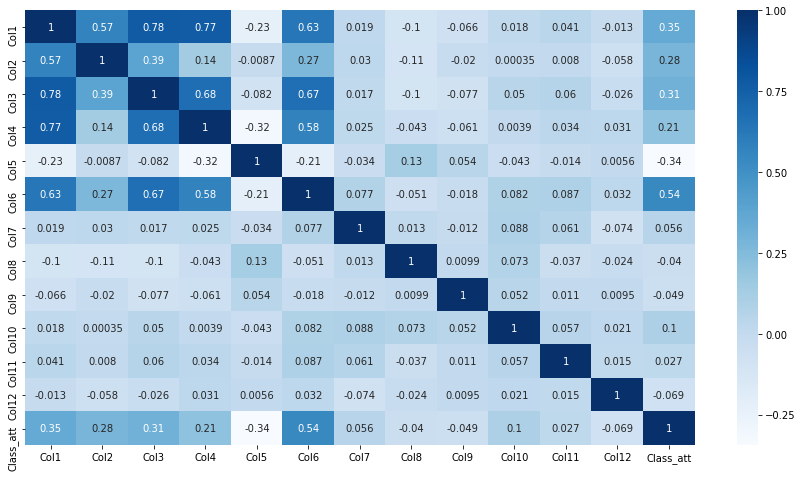

In [36]:
# Outliers removed
# Variables correlated with target
plt.rcParams["figure.figsize"]=[15,8]
sns.heatmap(df.corr(),annot=True,cmap="Blues")

# Col6 has high correlation with target while Col 1,2,3,4 have moderate correlation

In [39]:
#c
df.head()
df.drop("Unnamed: 13",axis=1,inplace=True)
# We drop Unnamed: 13 since its not much relevant to target classification and it has null values

# Other actions may include removal of facotrs based on vif to remove multicollinearity and removig varibales whose p value is less
# meaning they are less significat in model building


In [41]:
X=df.drop("Class_att",axis=1)
y=df["Class_att"]

In [43]:
#d
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=10,test_size=0.3)




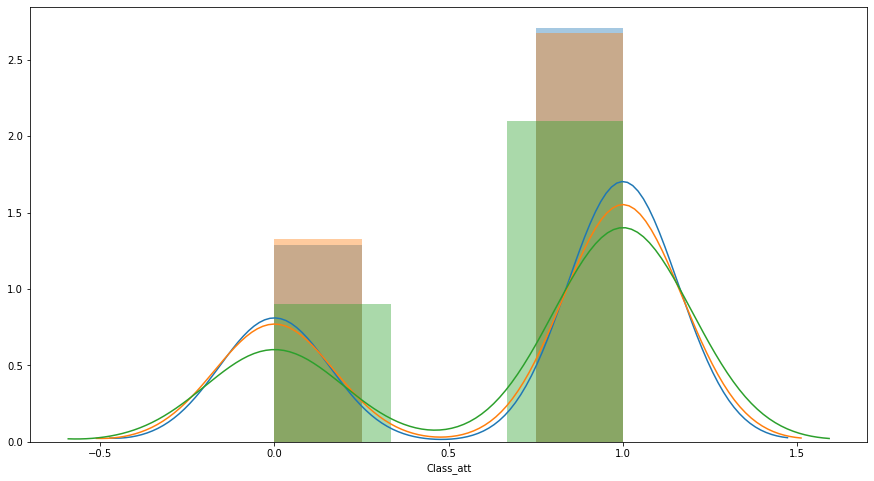

In [47]:
sns.distplot(y)
sns.distplot(ytrain)
sns.distplot(ytest)
# Distribution of target variable in train and test is similar to that in overall data, thus they sigificantly represent the data.



### 3.	Model Building (25 marks)

a.	Fit a base model and explain the reason of selecting that model. Please write your key observations. (5 marks)

b.	What is the overall Accuracy? Please comment on whether it is good or not.  (4 mark)

c.	Evaluate the model built using Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement. (5 marks) 

d.	How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model.  (7 marks)

e.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain. (4 marks)


In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.fit_transform(xtest)


In [50]:
#A
# Since its a classification problem lets apply Logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
model=log.fit(xtrain_scaled,ytrain)
pred=model.predict(xtest_scaled)



In [51]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(ytest,pred))
print(classification_report(ytest,pred))

#B
# Accuracy is high that is 0.8279 which tells us the ratio of correct predictions out of total predictios.
# But this is misleading as we had more data in class 1 than class 0 thus accuracy is high even though
# model ist able to correctly predict class 0 that well due to little data.

#C
# As was expected, f1 score of class 1(Abormal) which had more observations is higher than class 0(Normal) which had relatively 
# less data so we need to correct the imbalance data usig smote or over or under samplig one of the classes.

0.8279569892473119
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        28
           1       0.88      0.88      0.88        65

    accuracy                           0.83        93
   macro avg       0.80      0.80      0.80        93
weighted avg       0.83      0.83      0.83        93



In [62]:
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
0,0.194678,0.875134,-0.669319,-0.175980,-1.874433,-0.880216,0.951630,-1.015066,0.434293,1.167129,-1.196587,1.712368
1,-1.292891,-0.816078,-1.478179,-1.084438,-0.375826,-0.681160,-0.202553,-0.977816,1.316291,1.679551,-0.940325,-0.913941
2,0.554872,0.829901,-0.088292,0.309799,-1.177905,-1.015543,0.006694,0.639127,1.302680,1.635969,-1.227178,-0.615686
3,0.583728,1.159488,-0.408703,0.153943,-1.570037,-0.406564,-0.363213,0.259554,-0.105211,-0.176157,-1.345020,-0.652989
4,-0.631614,-0.871440,-1.295164,-0.208779,-0.969906,-0.542597,0.246670,1.643094,0.851472,-1.059666,-0.190502,-0.069858


In [63]:
#D
# Model accuracy ca be improved by checking first for multicollinearity and removing highly correlated variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range (12)]
vif["Features"]=X.columns
vif
# No columns can be dropped based on VIF

,VIF Factor,Features
0,6.330725,Col1
1,2.201400,Col2
2,3.225126,Col3
3,3.955306,Col4
4,1.220468,Col5
5,2.049430,Col6
6,1.027426,Col7
7,1.050374,Col8
8,1.015731,Col9
9,1.034323,Col10


In [66]:
# We can apply Radom forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,criterion="gini")
model2=rf.fit(xtrain_scaled,ytrain)
pred2=model2.predict(xtest_scaled)
print(accuracy_score(ytest,pred2))
print(classification_report(ytest,pred2))

0.8172043010752689
              precision    recall  f1-score   support

           0       0.74      0.61      0.67        28
           1       0.84      0.91      0.87        65

    accuracy                           0.82        93
   macro avg       0.79      0.76      0.77        93
weighted avg       0.81      0.82      0.81        93



In [ ]:
# We can channge the threshold for logistic regression using Youden's index max(TPR-FPR)

Optimization terminated successfully.
         Current function value: 0.442460
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Class_att   No. Observations:                  217
Model:                          Logit   Df Residuals:                      205
Method:                           MLE   Df Model:                           11
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.3037
Time:                        10:29:37   Log-Likelihood:                -96.014
converged:                       True   LL-Null:                       -137.89
Covariance Type:            nonrobust   LLR p-value:                 2.760e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1641      0.558      0.294      0.769      -0.930       1.258
x2             0.5703      0.319      1.790      0.074      -0.054       1.195
x3            -0.1028      0.320     -0.321      0.748      -0.730       0.524
x4            -0.9241      0.444     -2.080      0.038      -1.795      -0.053
x5            -1.0764      0.236     -4.563      0.000      -1.539      -0.614
x6             1.8269      0.329      5.547      0.000       1.181       2.472
x7            -0.1227      0.186     -0.659      0.510      -0.488       0.242
x8             0.1731      0.192      0.904      0.366      -0.202       0.548
x9            -0.2021      0.183     -1.107      0.268      -0.560       0.156
x10           -0.0137      0.183     -0.075      0.941      -0.373       0.345
x11           -0.1362      0.183     -0.745      0.456      -0.494       0.222
x12           -0.2047      0.186     -1.100      0.271      -0.569       0.160
==============================================================================
"""

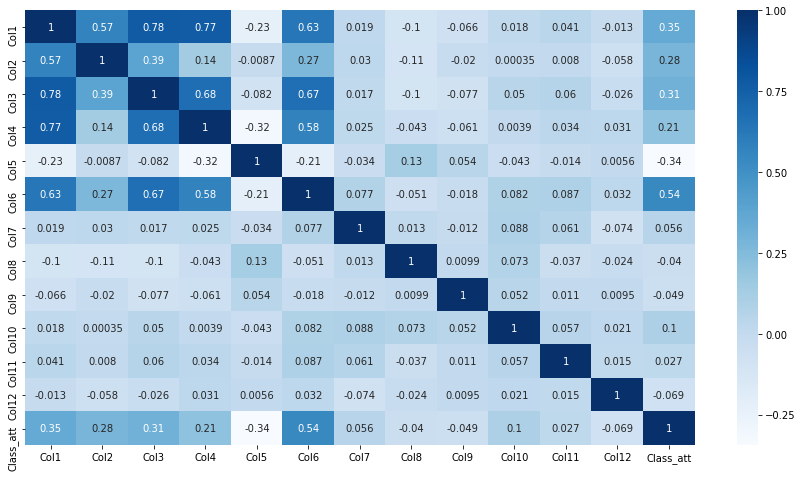

In [71]:
# e
sns.heatmap(df.corr(),annot=True,cmap="Blues")
# Based on correlation Col6 affects target the most followed by Col 1,2,3,4

import statsmodels.api as sm
model3=sm.Logit(ytrain,xtrain_scaled).fit()
model3.summary()

# p val based col 6 is most signiicant
